<a href="https://colab.research.google.com/github/intouchkey/codelab/blob/main/Algorithm_Design_and_Analysis_Data_Structures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Acknowledgement

The content in this notebook are based on the slides created by Kevin Wayne at https://www.cs.princeton.edu/~wayne/kleinberg-tardos/.

The pictures below are extracted from the aforementioned slides.

# Priority Queues

A priority queue is an abstract data type for a collection of elements, where each element has an associated key. The keys are usually numbers (integers or reals), but can be drawn from any totally-ordered set. The keys represent priority levels of elements. Given any two elements, say $x$ and $y$, we can compare them by their keys: 
*   $x < y$: the key of $x$ is less than the key of $y$. 
*   $x > y$: the key of $x$ is greater than the key of $y$.
*   $x \approx y$: the keys of $x$ and $y$ are equal.

A min priority queue supports the extraction of a smallest element. Similarly, a max priority queue supports the extraction of a largest element. In the least, a min priority queue must support the following operations:
*   **pq.isEmpty()**: return True if the priority queue pq is empty and return False otherwise.
*   **pq.insert(x)**: insert the element x into the priority queue pq.
*   **pq.extractMin()**: remove and return a minumum element in pq.

For a max priority queue, the operations are the same, except that extractMin is replaced by extractMax. In the rest of this chapter, by a priority queue, we shall mean a min priority queue.

In some applications, the following operations on priority queues are also useful or required:
*   **pq.findMin()**: return a minimum element from the priority queue pq without removing it.
*   **pq.decreaseKey(x,k)**: decrease the key of the element x to k.
*   **pq.meld(pq1)**: insert all the elements from the priority queue pq1 into pq.


**How can we implement a priority queue?**

**Method 1. Use a sorted array**<br>
Store the elements in an array. Always maintain the array to be descendingly sorted at all times, i.e. a larger object comes before a smaller object. When adding a new object, insert it at a correct place to ensure the sortedness of the array. Extracting a minimum object is just removing the last element.

Since insertion involves scanning for a correct place to insert a new element (which involves shifting all the smaller elements one place to the right), the worst-case running time of insert is O(n), where n is the number of elements being stored. extractMin involves removing the last element and clearly takes O(1) time.

This method is thus not suitable for an application that inserts elements often.

**Method 2. Use an unsorted array**<br>
Store the elements in an array but don't bother maintaining any order of the elements in the array. When adding a new element, just insert it at the last place. But to extract a minimum element, find a minimum element and remove it.

Clearly, insert takes O(1) time. On the other hand, extractMin involves sequential searching for a minimum element, taking it out, and shifting all the smaller elements one place to the left. This means the worst-case running time of extractMin is O(n), where n is the number of elements beinig stored.

This method is thus not suitable for an application that extracts minimum elements often. 

In both Methods 1 and 2, when creating a new array for a priority queue, we need to specify an initial size of the array. Later on when there are more elements to be stored than the capacity of the array, we will need to allocate a new larger array and move the existing elements to the new array. Thus, the array used to stored a priority queue can be seen as a dynamic table. Recall from our discussion of an amortized analysis of dynamic tables that, if we have a good policy on the expansion or reduction the size of a dynamic table, inserting or deleting the last element will take O(1) amortized time and the space usage will still be O(n), where n is the number of objects being stored.

**Method 3. Use a sorted linked list**<br>
Store the elements in a linked list. Always maintain the linked list to be descendingly sorted at all times, i.e. a larger element comes before a smaller object. Similar to Method 1, when adding a new element, insert it at a correct place to ensure the orderliness. Extracting a minimum element is just removing the last element.

Like Method 1, insertion still involves scanning for a correct place to insert a new element and thus takes O(n) time, where n is the number of elements being stored. But since this is a linked data structure, there is no need to shift each smaller object one by one like in an array. extractMin involves removing the last element and thus takes O(1) time.

As for Method 1, this method does not suit an application that inserts often.

<br>**So now let's conclude on the running time of each method:**<br>
<br>
Sorted array: O(n) for insertion and O(1) for extraction<br>
Unsorted array: O(1) for insertion and O(n) for extraction<br>
Sorted linked list: O(n) for insertion and O(1) for extraction<br>
<br>
**Method 4. Use a heap**<br>
In the previous methods, a priority queue was either stored as an unsorted collection of elements or a perfectly-sorted collection of elements. The former approach is slow in extraction but extremely fast in insertion; on the other hand, the latter approach is slow in insertion but extremely fast in extraction. Is there a way to implement a priority queue so that insertion and extraction are both fast? The answer is Yes! As we shall study in the next section, a priority queue can be stored in a tree structure, called a heap, which satisfies a certain orderedness condition. In a way, a heap can be seen a "partially ordered" structure.

# Binary Heaps

Recall that a **binary tree** is a tree in which each node has at most two children. A **complete binary tree** is a binary tree in which every level, except possibly the last, is completely filled, and all nodes in the last level are filled from left to right. Note that in our discussion here, a binary tree could be empty, i.e. might not contain any node at all.

**Property 1**. The height of a non-empty complete binary tree with $n$ nodes is $\lfloor \mathrm{log}_2 n \rfloor$.



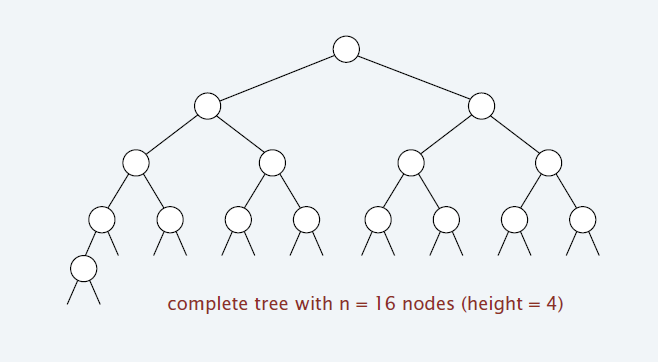

A binary heap is a data structure for a priority queue. Objects in a binary heap are stored in a complete binary tree in such a way that the following condition is satisfied:

**Heap orderedness:** Any non-root node must be no smaller than its parent.



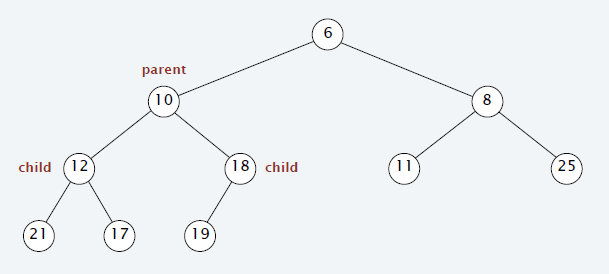

**Two methods for storing a binary heap**

(1) Using pointers. Each node keeps a pointer to its parent and pointers to the left child and the right child. 

**Quiz.** Suppose we maintain the total number of nodes and a pointer to the root. How do we find the last node in $O(\mathrm{log}\,n)$ worst-case time?

(2) Using an array. Store the nodes from the root to the rightmost node of the bottom level in a one-dimensional array. 

Suppose array indices start from 0. If node x is stored at index $k$, then
*   The parent of x is stored at index $\lfloor \frac{k-1}{2} \rfloor$;
*   The left child of x is stored at index $2k + 1$;
*   The right child of x is stored at index $2k + 2$.

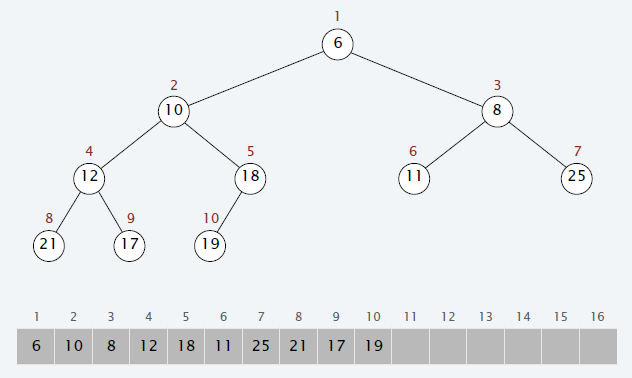

In [ ]:
class Element:
  def __init__(self,k,v):
    self.key = k
    self.value = v
  def __lt__(self,e):
    return (self.key < e.key)
  def __le__(self,e):
    return (self.key <= e.key)
  def __gt__(self,e):
    return (self.key > e.key)
  def __ge__(self,e):
    return (self.key >= e.key)
  def __str__(self):
    return "("+str(self.key)+","+str(self.value)+")"

class MinHeap:
  def __init__(self):
    self.heapArray = []
  def getElement(self,pos):
    return self.heapArray[pos]
  def size(self):
    return len(self.heapArray)
  def isEmpty(self):
    return len(self.heapArray)==0
  def parentIndex(self,pos):
    return (pos-1)//2
  def leftChildIndex(self,pos):
    return 2*pos+1
  def rightChildIndex(self,pos):
    return 2*pos+2
  def lastIndex(self):
    return len(self.heapArray)-1
  def exchange(self,pos1,pos2):
    self.heapArray[pos1],self.heapArray[pos2] = self.heapArray[pos2],self.heapArray[pos1]

**Heap operation: Insert**

Add the new object at the end. Repeatedly exchange the new object with its parent until heap order is restored. This operation takes O($h$) or O($\mathrm{log}\,n$), where $h$ is the height of the binary heap and $n$ is the number of nodes, in the worst case.



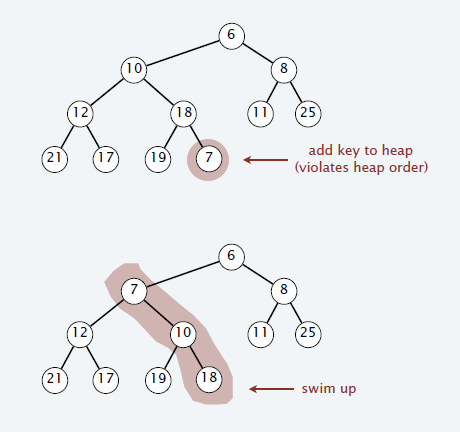

In [ ]:
class MinHeap(MinHeap):
  def insert(self,e):
    if self.isEmpty():
      self.heapArray.append(e)
    else:
      self.heapArray.append(e)
      pos = self.lastIndex()
      parent = self.parentIndex(pos)
      while (pos>0) and (self.heapArray[parent] > e):
        self.exchange(pos,parent)
        pos = parent
        parent = self.parentIndex(pos)

# Test
H = MinHeap()
H.insert(Element(5, 50))
print(*H.heapArray)
H.insert(Element(2, 20))
print(*H.heapArray)
H.insert(Element(3, 30))
print(*H.heapArray)
H.insert(Element(4, 40))
print(*H.heapArray)

(5,50)
(2,20) (5,50)
(2,20) (5,50) (3,30)
(2,20) (4,40) (3,30) (5,50)


**Heap operation: Extract Min**

Exchange the root with the last node. Remove and return the last node. Repeatedly exchange the new root with its smaller child until heap order is restored. This operation takes O($h$) or O($\mathrm{log}\,n$), where $h$ is the height of the binary heap and $n$ is the number of nodes, in the worst case.


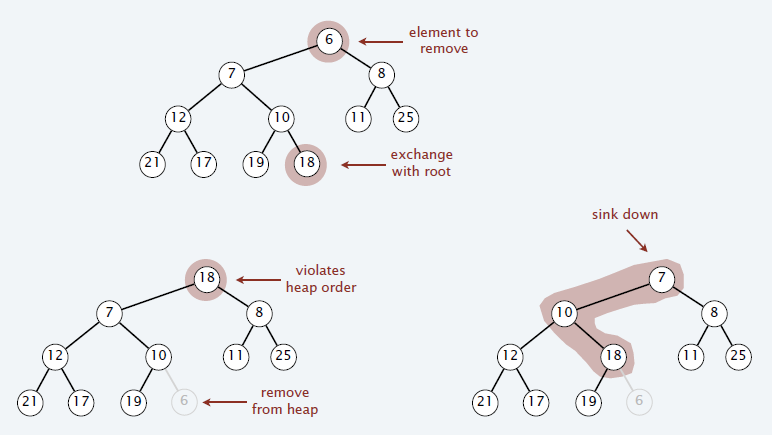

In [ ]:
class MinHeap(MinHeap):
  def extractMin(self):
    if self.isEmpty():
      return None
    else:
      self.exchange(0,self.lastIndex())
      e = self.heapArray.pop()
      pos = 0
      last = self.lastIndex()
      left = self.leftChildIndex(pos)
      right = self.rightChildIndex(pos)
      while left <= last:
        if right > last:
          if self.heapArray[left] < self.heapArray[pos]:
            self.exchange(left,pos)
            pos = left
          else:
            break
        else:
          if (self.heapArray[left] < self.heapArray[pos]) and (self.heapArray[left] <= self.heapArray[right]):
            self.exchange(left,pos)
            pos = left
          elif (self.heapArray[right] < self.heapArray[pos]) and (self.heapArray[right] <= self.heapArray[left]):
            self.exchange(right,pos)
            pos = right
          else:
            break
        left = self.leftChildIndex(pos)
        right = self.rightChildIndex(pos)
      return e

# Test
H = MinHeap()
H.insert(Element(5, 50))
H.insert(Element(2, 20))
H.insert(Element(3, 30))
H.insert(Element(4, 40))
print(*H.heapArray)
print(H.extractMin())
print(*H.heapArray)
print(H.extractMin())
print(*H.heapArray)
print(H.extractMin())
print(*H.heapArray)
print(H.extractMin())
print(*H.heapArray)

NameError: ignored


**Heap operation: Decrease Key**

Given an index of a node, decrease the key of that node. Repeatedly exchange the node with its parent until heap order is restored. This operation takes O($h$) or O($\mathrm{log}\,n$), where $h$ is the height of the binary heap and $n$ is the number of nodes, in the worst case.



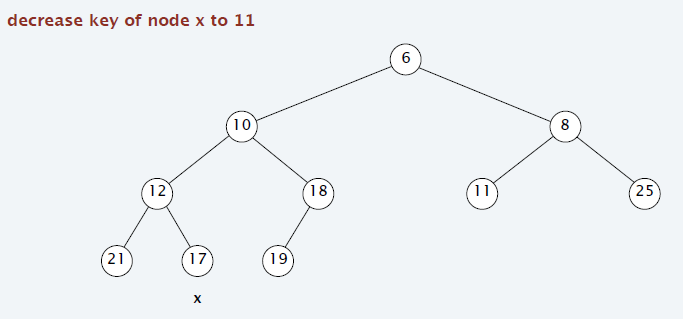

In [ ]:
class MinHeap(MinHeap):
  def decreaseKey(self,pos,key):
    pass

**Heap operation: Find Min**

Just return the root without removing it from the heap. O($1$) worst-case running time.


In [ ]:
class MinHeap(MinHeap):
  def findMin(self):
    pass


**Heap operation: Meld Two Heaps**

Given a binary heap H and another binary heap G, we would like to insert all nodes of G into H. The straightforward way is to insert each node of G into H one by one. Clearly, the total running time will be O($n\mathrm{log}\,n$).



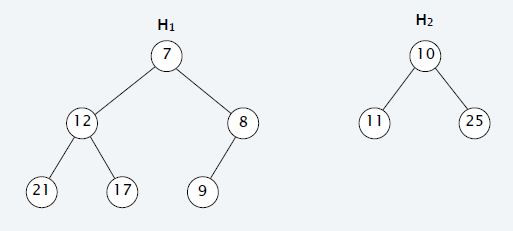

There is a more efficient way. First, append the array that stores the heap G to the array that stores the heap H. Suppose the index of the last node in H is now n. For i = n to 0, repeatedly exchange the object at node i with its smaller child until subtree rooted at i is heap-ordered.

It can be shown that, in this way, the running time is O($n$) in the worst case.
*   The number of exchanges when processing node i is proportional to the height of node i.
*   There are at most $\lceil \frac{n}{2^{h+1}} \rceil$ nodes of height $h$.
*   Therefore, the total running time is bounded by

$\sum_{h=0}^{\lfloor\mathrm{log}\,n\rfloor} \lceil \frac{n}{2^{h+1}} \rceil \cdot h \quad \leq \quad \sum_{h=0}^{\lfloor\mathrm{log}\,n\rfloor} \frac{nh}{2^h} \quad \leq \quad 2n$.



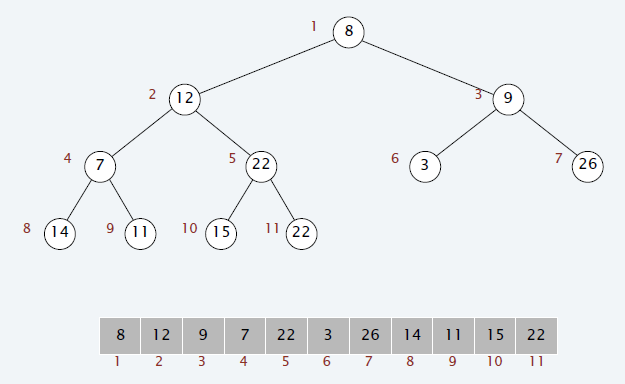

In [ ]:
class MinHeap(MinHeap):
  def meld(self,G):
    pass

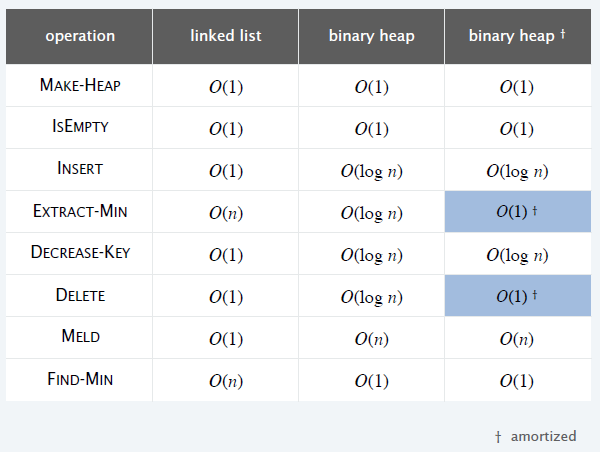

# Binomial Heaps

Operations on binary heaps that we studied are all sub-linear time, except one, melding two heaps, which has the worst-case time complexity of O($n$). A kind of heaps, called Binomial Heaps, was introduced to speed up the meld operation. Unlike a binary heap which stores objects in a single complete binary tree, a binomial heap stores objects in a collection of one or more trees, called binomial trees. As we shall see, by maintaining a collection of trees instead of having just one tree, the meld operation can be performed in O($\mathrm{log}\,n$).

A binomial tree of order $k$ is defined inductively as follows:
*   A single node is a binomial tree of order $0$.
*   One binomial tree of order $k-1$ linked to another binomial tree of order $k-1$ at the root is a binomial tree of order $k$.











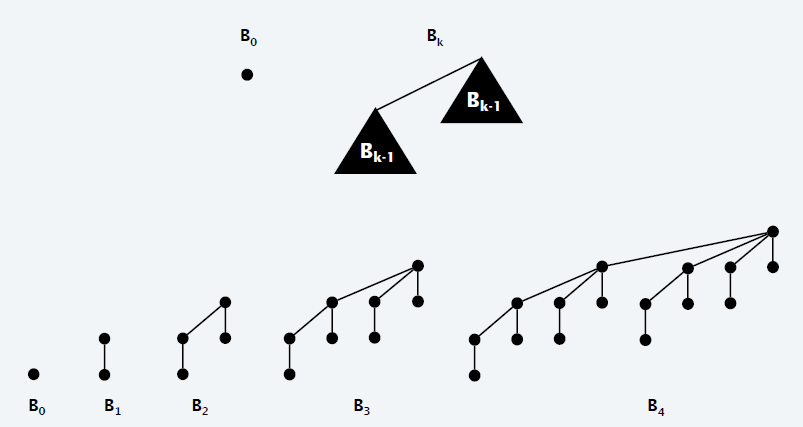

Some properties of binomial trees: Given any binomial tree $B$ of order $k$:
1.   Its height is $k$.
2.   It has $2^k$ nodes.
3.   It has $k \choose i$ nodes at level $i$.
3.   The root has $k$ children.
3.   Deleting the root results in $k$ binomial trees, $B_{k-1}, ..., B_0$, where each $B_i$ is of order $i$.

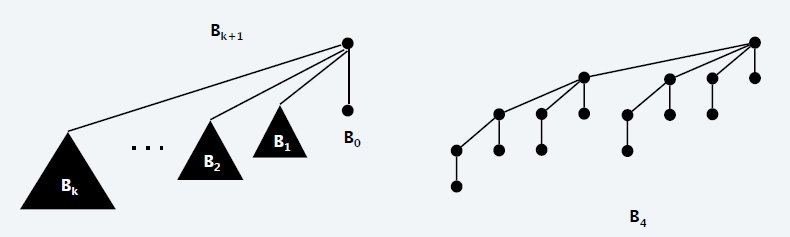

A binomial heap is a sequence of binomial trees such that:
*   Each tree is heap-ordered.
*   For each $k$, there is at most one binomial tree of order $k$.



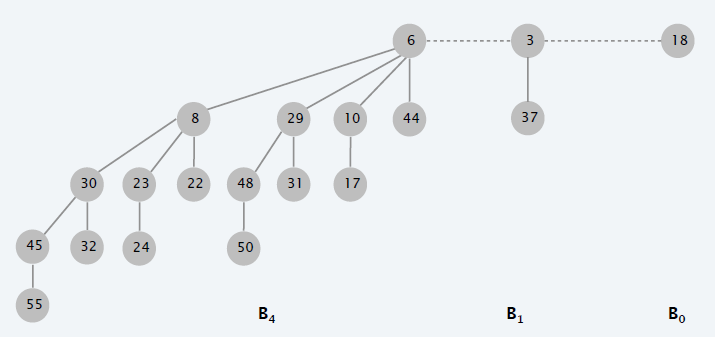

**Storing a binomial heap**

Even though a binomial tree is not a binary tree, there is a way to store it as a binary tree. Suppose the object at node $x$ in a binomial tree is stored at node $x'$ in the binary-tree representation of the binomial tree.  Then 
*   the left child of $x$ is stored as the left child of $x'$, and 
*   the right sibling of $x$ is stored as the right child of $x'$.

A binomial heap stores a list of its binomial trees, sorted from the tree with the least order to the one with the highest order.



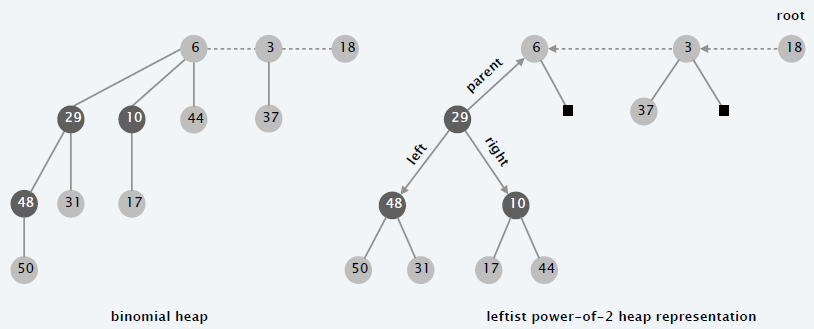

Some properties of binomial heaps: Given any binomial heap $H$ with $n$ nodes:
1.   The node containing the min element is the root of one of the binomial trees in $H$.
2.   $H$ contains the binomial tree $B_i$ iff $b_i = 1$, where $b_k \cdots b_2 b_1 b_0$ is the binary representation of $n$.
3.   $H$ has $\leq \lfloor \mathrm{log}_2 n \rfloor + 1$ binomial trees.
4.   The height of any binomial tree in $H$ is $\leq \lfloor \mathrm{log}_2 n\rfloor$.

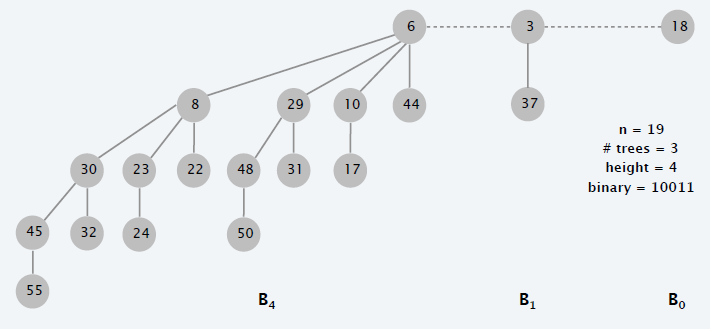

**Heap operation: Meld two heaps**

We cannot simply merging two heaps by unioning them because the two heaps may have binomial trees of same of order and having two trees of same order would break the condition of binomial heaps. Instead, if there are two binomial trees of the same order, we can easily join them into one binomial tree. In particular, suppose $B_1$ and $B_2$ are binomial trees of the same order, say $k$, and suppose the root of the $B_2$ is no smaller than the root of $B_1$. We join these two trees by adding $B_2$ as a new child of the root of $B_1$. It is easily seen that the new tree is a binomial tree of order $k+1$. 


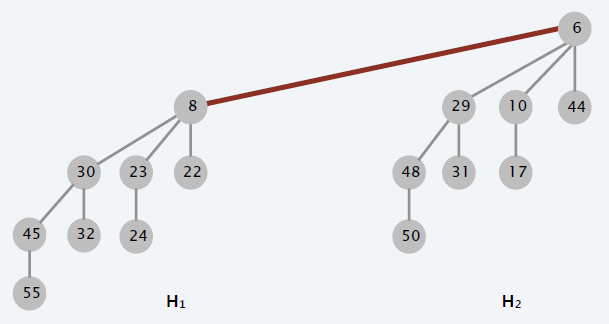

If one of the binomial heaps also has an existing binomial tree of order $k+1$, we repeat this process to join both binomial trees of order $k+1$ into a binomial tree of $k+2$, and so on. The process is analogous to binary addition.

Since a binomial heap with $n$ nodes contains no more than $\lfloor \mathrm{log}_2 n \rfloor + 1$ binomial trees, melding two binary heaps takes O($\mathrm{log}\, n$) worst-case time, where $n$ is the total number of nodes from the two heaps.

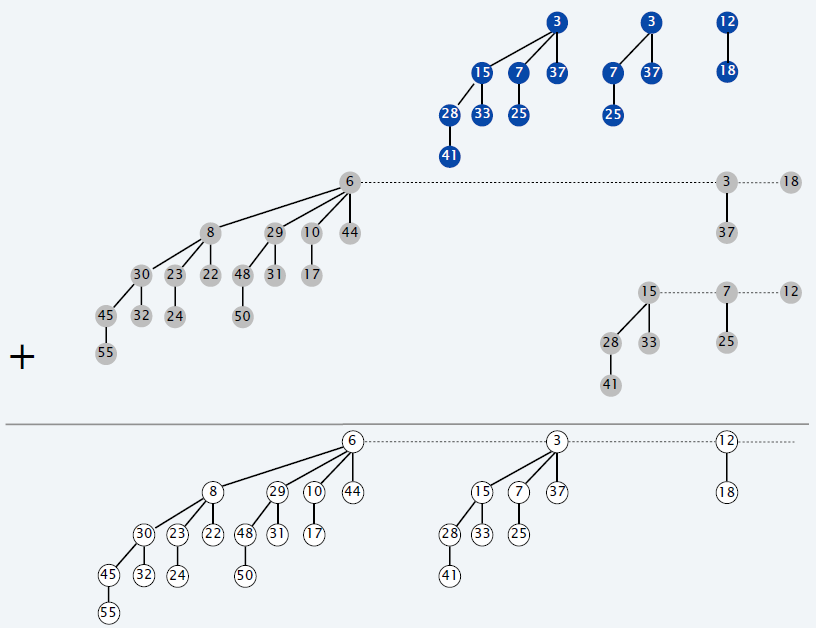

**Heap operation: Insert**

To insert a new element $x$ into a binomial heap $H$:
1.   Create a new binomial heap $H'$ consisting of only one binomial tree of order $0$ with just one node containing $x$.
2.   Meld $H'$ and $H$.

The running time is O($\mathrm{log}\, n$), where $n$ is the number of nodes in $H$.



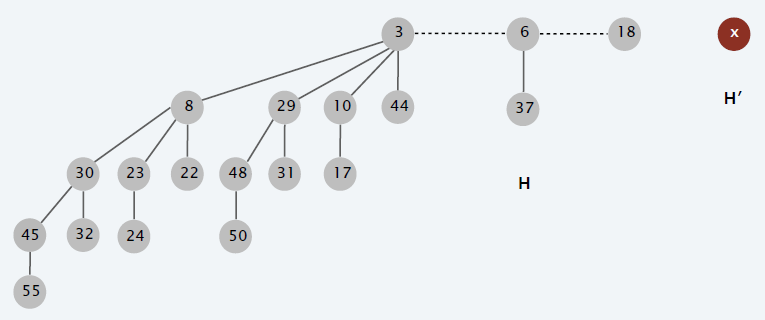

**Heap operation: Extract min**

To extract a minimum element from a binomial heap $H$:
1.   Find a binomial tree $B$ in which the root is no larger than all the other roots Remove $B$ from $H$. Call the new binomial heap $H'$.
2.   Remove that root node from $B$ and return it as a minimum element. If $B$ is of order $k$ (hence the root of $B$ has $k$ children), removing the root of $B$ will result in $k$ binomial trees: $B_0, B_1, ..., B_{k-1}$, where each $B_i$ is of order $i$.
3.   Merge the binomial heap $\{B_0, B_1, ..., B_{k-1}\}$ back into $H'$.

Since there are at most $\lfloor \mathrm{log}_2 n \rfloor + 1$ binomial trees in a binomial heap with $n$ nodes and the order of each binomial tree in the heap is no higher than $\lfloor \mathrm{log}_2 n \rfloor$, the total running time is O($\mathrm{log}\, n$).



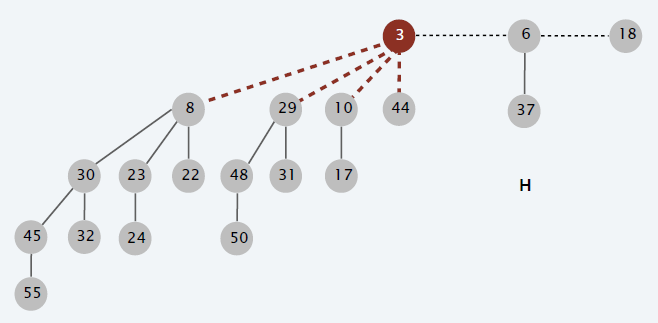

**Heap operation: Decrease key**

To decrease the key of the element at node $x$ in a binomial tree $B$ to $k$, 
1.   Decrease the key of the element at node $x$ to $k$.
2.   Repeatedly exchange $x$ with its parent until heap order is restored.

Since the height of each binomial tree in a binomial heap with $n$ nodes is at most $\lfloor \mathrm{log}_2 n\rfloor$, the running time is in O($\mathrm{log}\, n$).

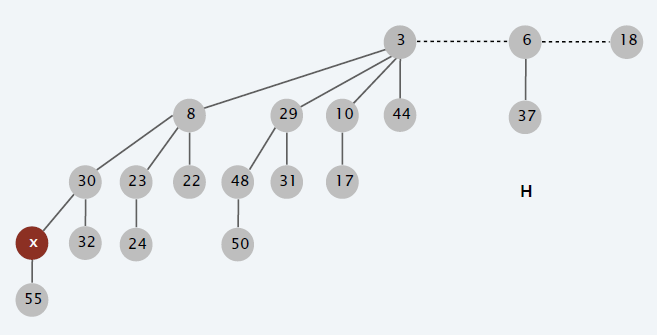

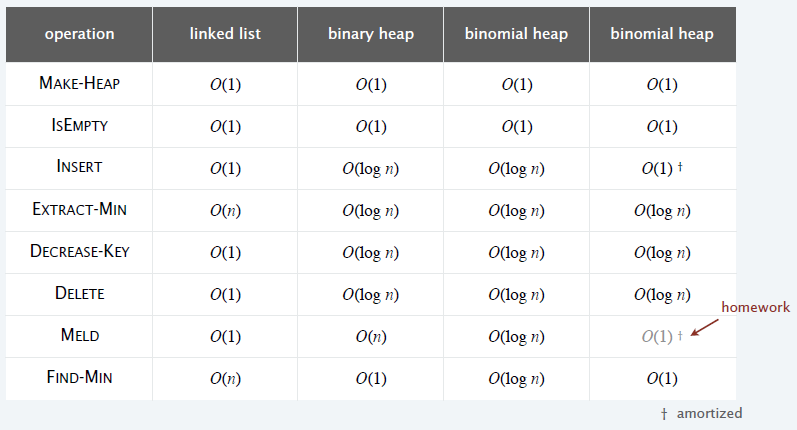

# Fibonacci Heaps

Fibonacci heaps improve upon the idea of binomial heaps to make the insert, decrease-key, and meld operations even quicker. As in binomial heaps, Fibonacci heaps store objects in a collection of trees. By relaxing the contraints on the number and the form of the trees in the collection, the insert, decrease-key and meld operations on Fibonacci heaps are less time-consuming than on binomial heaps. As we shall see, these three operations on Fibonacci heaps have $O(1)$ amortized running time.

**Structure of a Fibonacci heap**

A Fibonacci heap stores objects in a set of heap-ordered trees (i.e. the element stored at any non-root node is no smaller that the element stored at its parent). Also, some nodes in the heap are "marked". As we shall see later, the markings are introduced to ensure that each node does not have too many children, i.e. help bounding the rank of each node.

Each tree in a Fibonacci heap can be stored as linked nodes, where each node stores the following:
*   A pointer to its parent
*   A pointer to any of its children
*   A pointer to its left sibling and a pointer to its right sibling
*   Its rank (the number of its children)
*   A Boolean flag indicating whether the node is marked 

The trees in a Fibonnaci heap are stored in a circular linked list. In addition, the heap maintains a pointer to a root with a minimal element, which we will call the *min pointer*.


The following picture shows an example of how a Fibonacci heap is stored.

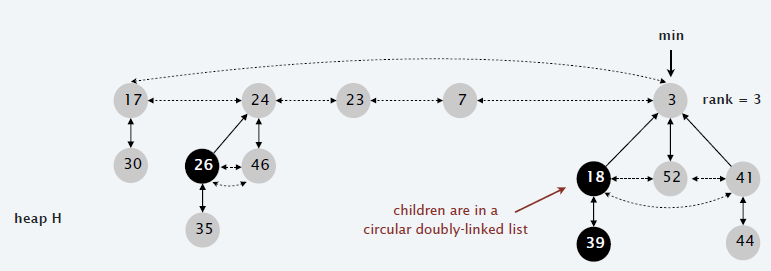

For brevity, the following notations will be used in the rest of this section:
*   $n$ denotes the number of nodes in the heap that is being discussed.
*   $\mathrm{rank}(x)$ denotes the number of the children of node $x$.
*   $\mathrm{rank}(H)$ denotes the maximum rank of all the nodes in heap $H$.
*   $\mathrm{trees}(H)$ denotes the number of trees in heap $H$.
*   $\mathrm{marks}(H)$ denotes the number of marked nodes in heap $H$.

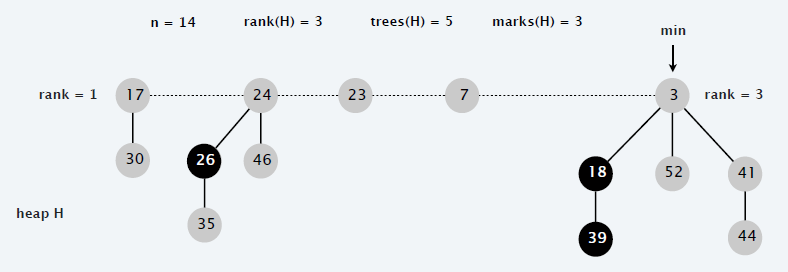

In what follows, we shall look at each operation of a Fibonacci heap, as well as analyze its amortized running time using the potential method.

Recall that in the potential method, a potential function $\Phi$ which assigns a non-negative number to any state of the data structure is defined such that $\Phi(H_0)$ is $0$, where $H_0$ is the data structure at the initial state. 

Then consider a sequence of operations $f_1, f_2, ..$  performed on the data structure starting from the initial state:  
$$
H_0 \xrightarrow{f_1} H_1 \xrightarrow{f_2} H_2 \xrightarrow{f_3} \cdots
$$

Let $c_i$ be the actual cost of each operation $f_i$. Suppose the amortized cost $\hat{c}_i$ of $f_i$ is defined as follows:
$$
\hat{c}_i = c_i + C \cdot (\Phi(H_i) - \Phi(H_{i-1})),
$$

where $C$ is a positive constant factor indicating the amount of work that a unit of potential increment can pay for. In most analyses, $C$ can be set to $1$, but it could be any fixed positive number.

If the amortized cost is as defined above, it can be shown that the total actual cost up to any operation $m$ is bounded by the total amortized cost so far. Precisely, for each $m \ge 1$,
$$
\begin{align}
\sum_{i=1}^m \hat{c}_i & = \sum_{i=1}^m \Big(c_i + C \cdot \big(\Phi(H_i) - \Phi(H_{i-1})\big)\Big) \\
& = \sum_{i=1}^m c_i + C \cdot \sum_{i=1}^m \big((\Phi(H_i) - \Phi(H_{i-1})\big) \\
& = \sum_{i=1}^m c_i + C \cdot \big(\Phi(H_m) - \Phi(H_0)\big) \\
& \ge \sum_{i=1}^m c_i.
\end{align}
$$

For the amortized analysis of the operations on Fibonacci heaps below, the following potential function shall be used:
$$
\Phi(H) = \mathrm{trees}(H) + 2 \cdot \mathrm{marks}(H),
$$

where $H$ is the Fibonacci heap at some particular state.

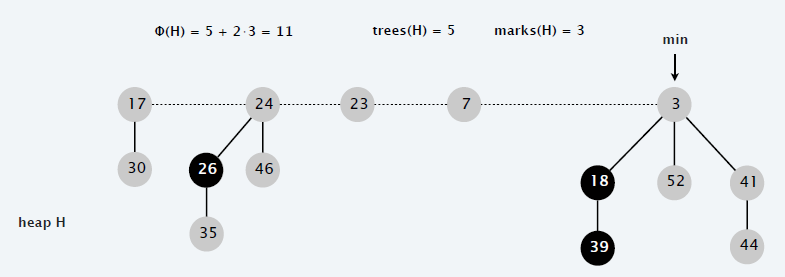

**Heap operation: Insert**

To insert a new element:
1.   Create a singleton tree
2.   Add the new tree to the list of trees and update the min pointer, if necessary. 

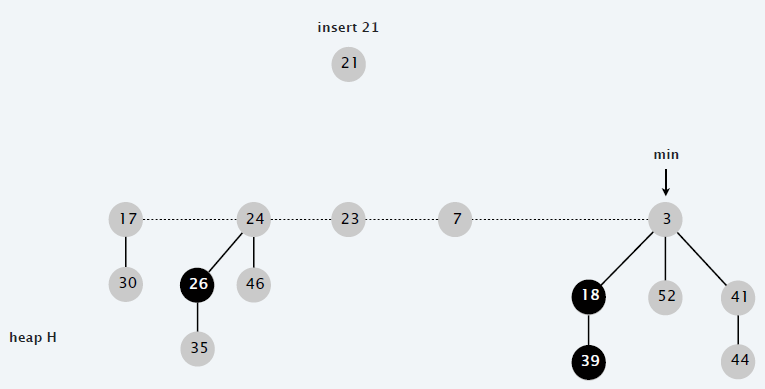

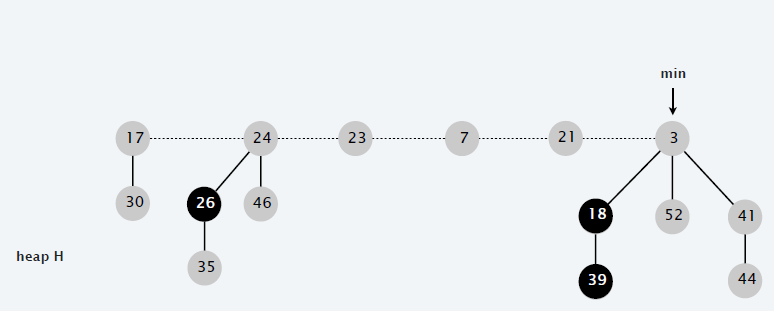

**Analysis.** Suppose $H$ is the state of the heap before the operation and $H'$ is the state of the heap after the operation. The actual cost $c$ is $O(1)$. Since the number of trees increases by one and there is no change in the number of marked nodes, the change in the potential is

$$
\Delta\Phi = \Phi(H') - \Phi(H) = 1.
$$

Thus, the amortized cost is 

$$
\hat{c} = c + C\cdot\Delta\Phi = O(1).
$$

**Heap operation: Meld**

To meld two heaps together, 
1.   Join the two circular linked lists that hold the trees in each heaps.
2.   Update the min pointer.

This operation can be performed in $O(1)$ worst-case time.

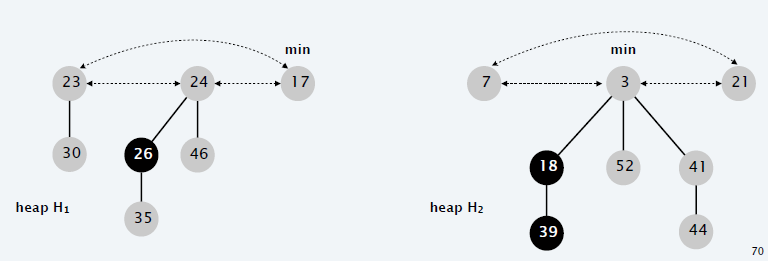

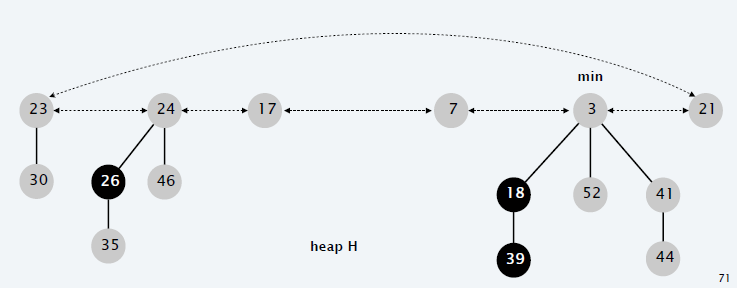

**Heap operation: Extract min**

The extract-min operation works in a similar way as in a binomial heap. Recall that, when extracting min in a binomial heap, the root with a minimum element is removed and the subtrees at its children are melded back into the heap. The meld operation subsequently joins binomial trees with the same order, so that after the operation, there is at most one binomial tree of any order. 

The extract-min operation in a Fibonacci heap works similarly, except that after adding the subtrees back into the heap, we subsequently join trees with the same *rank*, where the rank of a tree is the number of the children of its root. This ensures that after the operation, the number of trees in the heap is bounded by the rank of the heap.

To extract a minimum element:
1.   Remove the root of the tree where the min pointer is pointing to; store the element at that root to be returned at a minimum element.
2.   Add the subtrees below the removed root into the heap.
3.   Subsequently join the trees with the same rank so that there is at most one tree of any rank. While doing this, update the min pointer to point to the root with a minimum element.

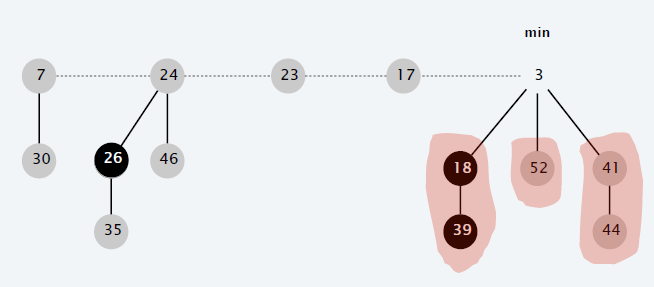

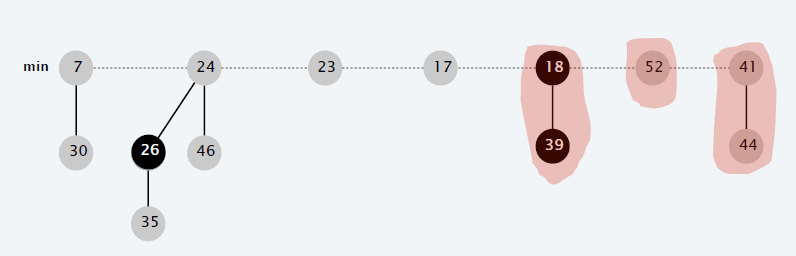

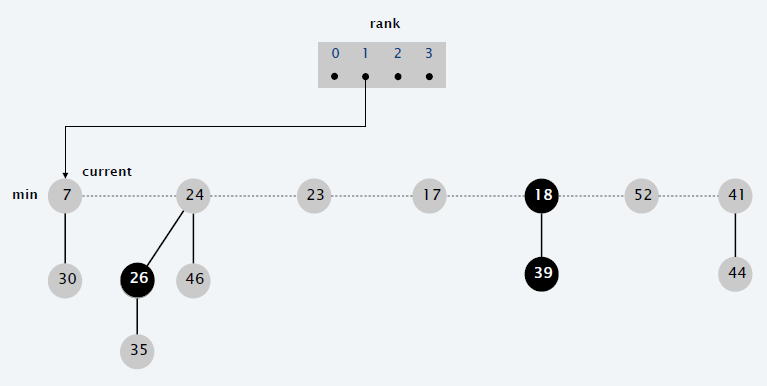

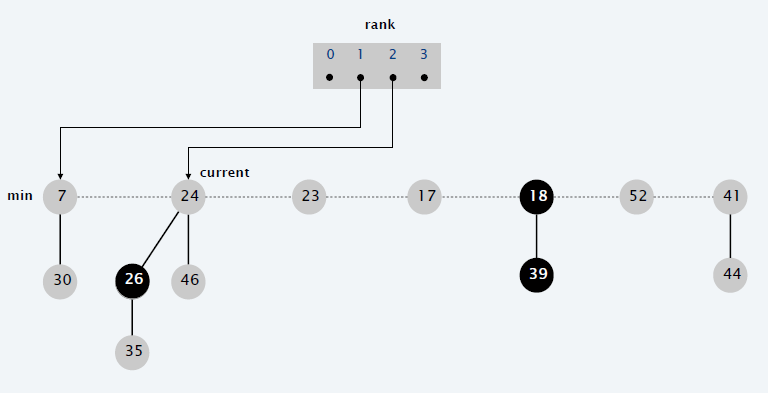

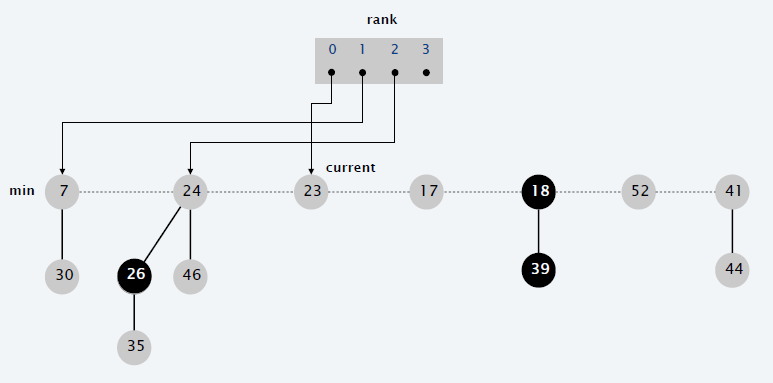

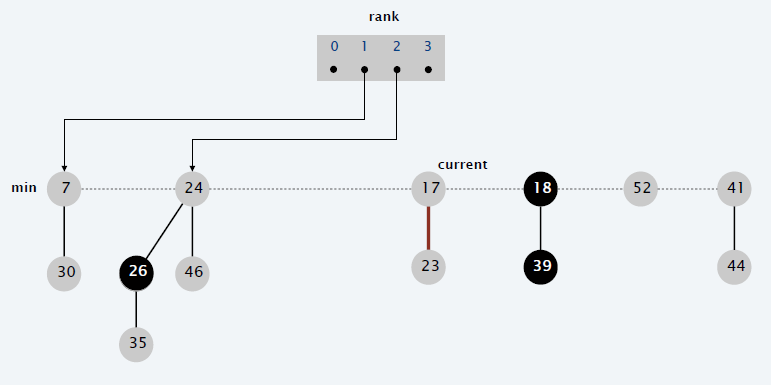

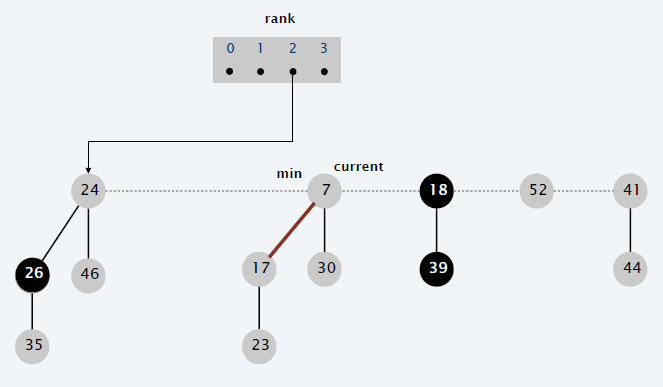

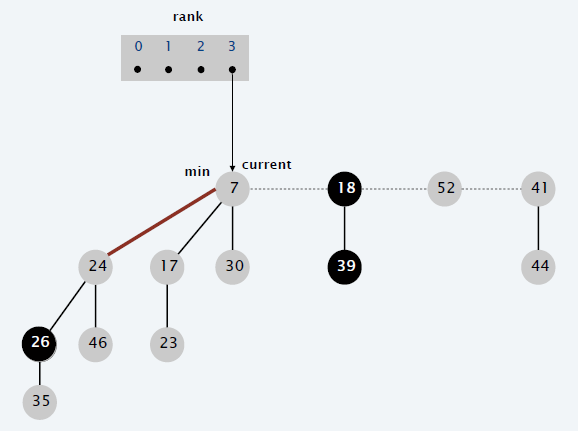

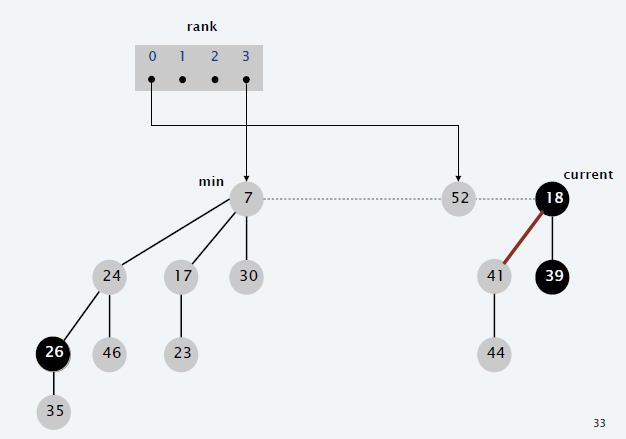

**Analysis.** Suppose $H$ is the state of the heap before the operation and $H'$ is the state of the heap after the operation.

Since there are at most $\mathrm{rank}(H)$ subtrees of the removed root, at most $\mathrm{rank}(H)$ subtrees are added to the heap. Hence, the total number of trees after adding will be at most $\mathrm{rank}(H) + \mathrm{trees}(H)$. Each step in the tree-joining process reduces the number of trees by one. Updating the min pointer can be carried out while scanninig the trees to merge. Hence, the actual cost of extract min is 

$$
c = O(\mathrm{rank}(H)) + O(\mathrm{trees}(H)).
$$

Since after the operation, no two trees have the same rank, $\mathrm{tree}(H') \le \mathrm{rank}(H')+1$. The number of marked nodes is unchanged. Hence, the change in the potential is

$$
\begin{align}
\Delta\Phi & = \Phi(H') - \Phi(H) \\
& = \big(\mathrm{trees}(H') + 2 \cdot \mathrm{marks}(H')\big) - \big(\mathrm{trees}(H) + 2 \cdot \mathrm{marks}(H)\big) \\
& = \mathrm{trees}(H') - \mathrm{trees}(H) \\
& \le \mathrm{rank}(H') + 1 - \mathrm{trees}(H)
\end{align} 
$$

Therefore, the amortized cost of extract min is

$$
\begin{align}
\hat{c} & = c + C \cdot \Delta\Phi \\
& \le O(\mathrm{rank}(H)) + O(\mathrm{trees}(H)) + C\cdot(\mathrm{rank}(H') + 1 - \mathrm{trees}(H)) \\
& = O(rank(H)) + O(\mathrm{rank}(H')).
 \end{align}
$$

In the above derivation, we can cancel out $O(\mathrm{trees}(H))$ and $C\cdot\mathrm{trees}(H)$ because we can choose $C$ to be some sufficiently large constant (i.e. larger than the constant in $O(\mathrm{trees}(H))$).

Later, we will show that $\mathrm{rank}(H)$ is bounded by $O(\mathrm{log}\, n)$, wher $n$ is the number of nodes in heap $H$. This implies that the amortized running time of extract min is $O(\mathrm{log}\, n)$.


**Heap operation: Decrease key**

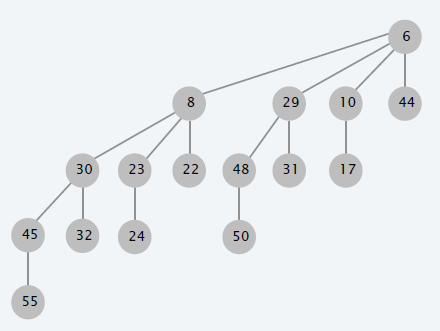

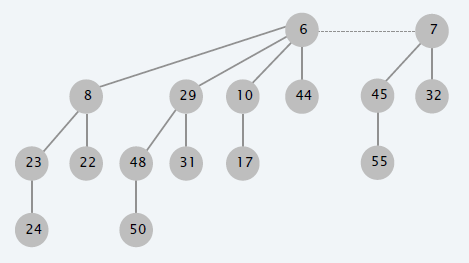

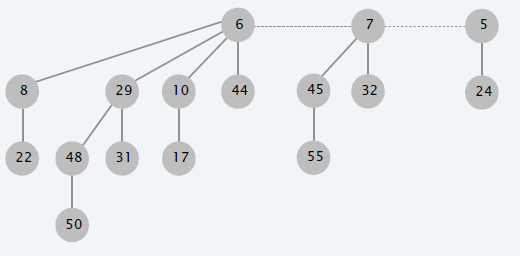

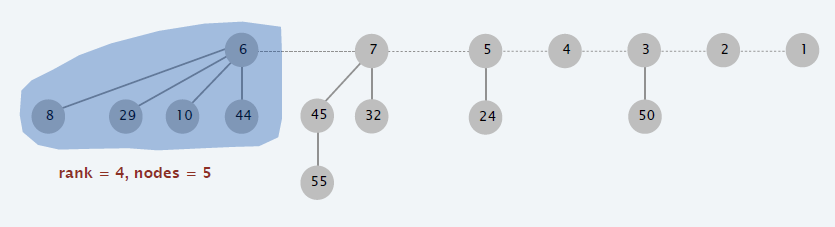

To decrease the key of the element at a given node $x$:
1.  Decrease the key at the element at $x$.
2.  If heap order is *not* violated, update the min pointer (if necessary) and return; else, do the following.
3.  Let $p$ be the parent of $x$.
4.  Cut the tree at node $x$, unmark $x$ (if $x$ is marked), add the subtree at $x$ as a new tree in the heap, update the min pointer (if necessary).
5.  If $p$ is the root, return.
6.  If $p$ is unmarked, mark it and return; else do the following.
7.  Let $p'$ be the parent of $p$.
8.  Cut the tree at node $p$, unmark $p$, and add the subtree at $p$ as a new tree in the heap.
9.  Set $p = p'$ and go to Step 5.
 

The marking of an unmarked node $p$ in Step 6 is used to remember that $p$ was stripped off a child once. Later on, if that marked node $p$ is stripped off a child for the second time, we cut node $p$ off the tree and add the subtree at $p$ as a new tree in the heap. As we shall show shortly, this ensures that a tree is not too flat, i.e. a node having many children but not many grandchildren.

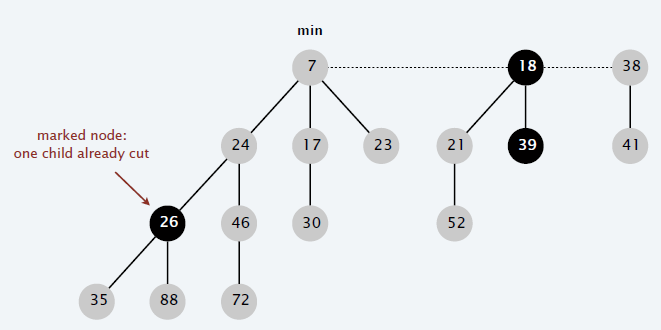

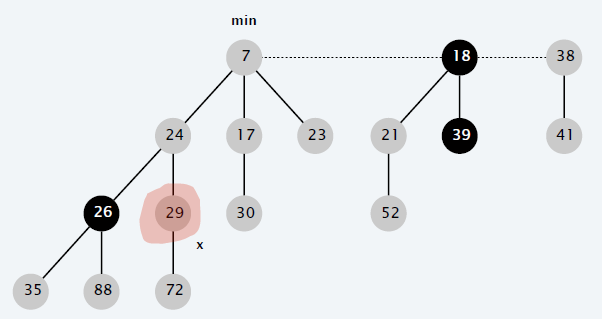

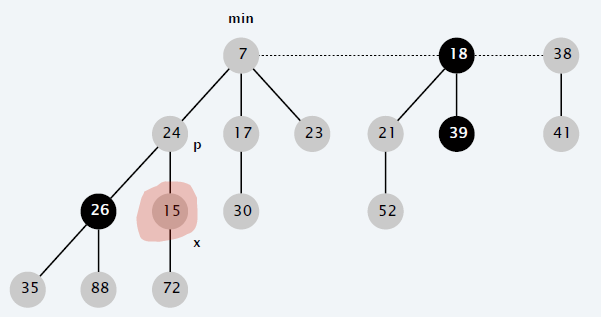

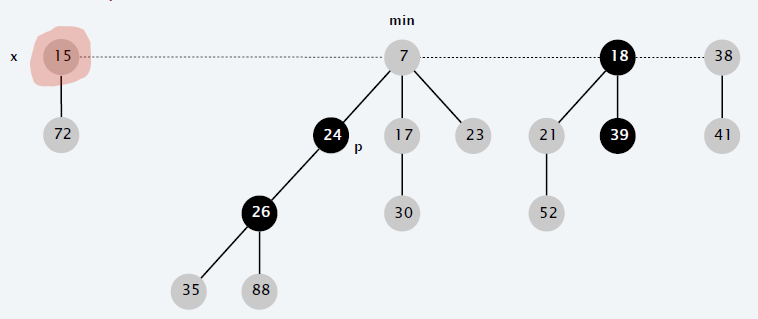

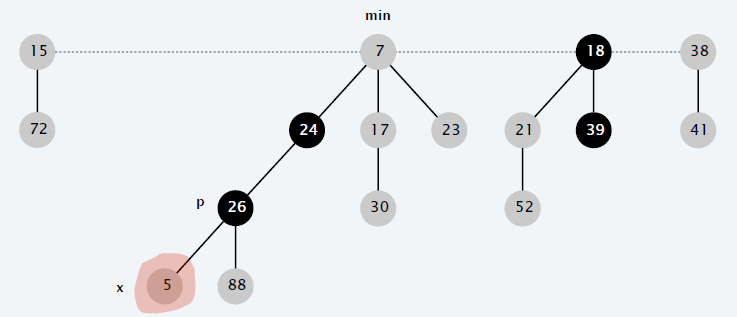

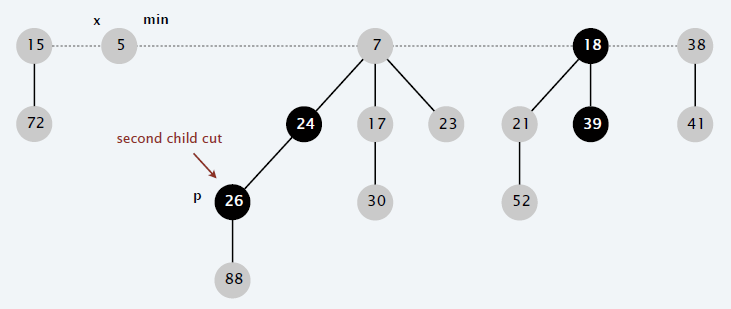

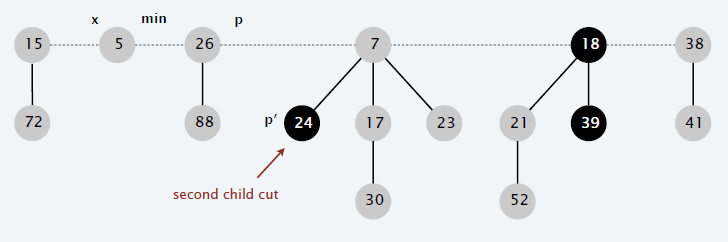

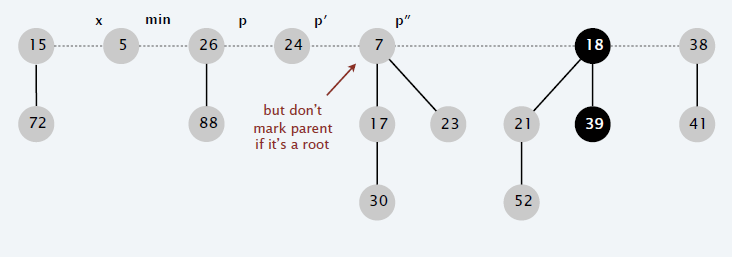

**Analysis.** Suppose $H$ is the state of the heap before the operation and $H'$ is the state of the heap after the operation. 

If the decrease-key operation does not make any cut, i.e. heap order is not violated after decreasing the key, then clearly the actual cost is $O(1)$, there is no change in the potential, and thus the amortized cost is $O(1)$.

Suppose the decrease-key operation makes $k \ge 1$ cuts (i.e. Step 4 is executed once and Step 8 is executed $k-1$ times). Since the operations in Step 3-9 takes $O(1)$, the actual cost $c$ is $O(k)$.

The number of new trees added is equal to the number of cuts, $k$. Step 4 unmarks node $x$ if $x$ is marked. Step 8 is executed $k-1$ times, each time unmarking a node. Either Step 5 or Step 6 is executed before the operation ends. If Step 6 is executed, one node is marked. Therefore, the number of marked nodes reduces by at least $k-2$. Hence, the change in the potential is

$$
\begin{align}
\Delta\Phi & = \Phi(H') - \Phi(H) \\
& = \big(\mathrm{trees}(H') + 2 \cdot \mathrm{marks}(H')\big) - \big(\mathrm{trees}(H) + 2 \cdot \mathrm{marks}(H)\big) \\
& = \big(\mathrm{trees}(H') - \mathrm{trees}(H)\big) + 2\cdot\big(\mathrm{marks}(H')-\mathrm{marks}(H)\big) \\
& \le k + 2\cdot(-k+2) \\
& = 4-k
\end{align}
$$

The amortized cost is
$$
\begin{align}
\hat{c} & = c + C \cdot \Delta\Phi \\
& \le O(k) + C \cdot (4-k) \\
& = O(1).
\end{align}
$$

In the above derivation, we can cancel out $O(k)$ and $C\cdot k$ because we can choose $C$ to be some sufficiently large constant (i.e. larger than the constant in $O(k)$).

Therefore, whether heap order was violated or not, the decrease-key operation has $O(1)$ amortized running time.

**Bounding the rank**

In this section, we shall prove that at any time, the maximum rank of any node in a Fibonacci heap with $n$ nodes is $O(\mathrm{log}\, n)$.

**Lemma 1.** Starting from an empty Fibonacci heap, suppose $H$ is the state of the heap after a number of operations have been performed. Let $x$ be a node of rank $k$, and let $y_1, ..., y_k$ are its children in the order in which they were linked to $x$. Then

$$
\mathrm{rank}(y_i) \ge
\begin{cases}
0    & \textrm{if } i=1 \\
i-2  & \textrm{if } i \ge 2
\end{cases}
$$

**Proof.** When $y_i$ was linked to $x$, $x$ had at least $i-1$ children $y_1, ..., y_{i-1}$. Since only trees of equal rank are linked, at that time $\mathrm{rank}(y_i) = \mathrm{rank}(x) \ge i-1$. Since then, $y_i$ has lost at most one child (or else $y_i$ would have been cut). Thus, in $H$, it must be that $\mathrm{rank}(y_i) \ge i-2$. $\square$ 

**Lemma 2.** Let $s_k$ be the minimum number of nodes in any Fibonacci heap of rank $k$. Then, $s_k \ge F_{k+2}$, where $F_k$ is the $k^{th}$ Fibonacci number.

**Proof.** Use strong induction on $k$. The base cases where $k$ is $0$ or $1$ are true, because $s_0 = 1 = F_2$ and $s_1 = 2 = F_3$.

For the inductive step, assume that $s_i \ge F_{i+2}$ for $i=0,...,k-1$. 

Let $T_k$ be a smallest Fibonacci heap with rank $k$. Hence, $T_k$ has $s_k$ nodes. Let $x$ be a node in $T_k$ with $k$ children. As in Lemma 1, let $y_1,...,y_k$ denote the children of $x$ in the order in which they were linked to $x$. 

$$
\begin{align}
s_k & \ge \textrm{the number of nodes in the subtree at $x$} \\
& = 1 + \sum_{i=1}^k \textrm{the number of nodes in the subtree at $y_i$} \\
& \ge 1+(s_0+s_0+s_1+...+s_{k-2})  & & \textrm{By Lemma 1} \\
& \ge 1+(F_1+F_2 + F_3 + ... + F_k)  & & \textrm{By induction hypothesis} \\
& = F_{k+2}  & & \textrm{Property of Fibonacci numbers}.
\end{align}
$$
$\square$ 

**Fibonacci Lemma.** Let $H$ be a Fibonacci heap with $n$ elements. Then, $\mathrm{rank}(H) = O(\mathrm{log}\, n))$.

**Proof.** Let $H$ be a Fibonacci heap with $n$ elements and rank $k$. By Lemma 2, $n \ge s_k \ge F_{k+2}$. From a fact about Fibonacci numbers, $F_{k+2} \ge \phi^k$, where $\phi$ is the golden ratio, $\frac{1+\sqrt{5}}{2} \approx 1.618$. Taking logs, we obtain $\mathrm{rank}(H) = k \le \mathrm{log}_\phi n$. Hence, $\mathrm{rank}(H) = O(\mathrm{log}\, n)$. $\square$ 


**Summary of the running time of each operation**

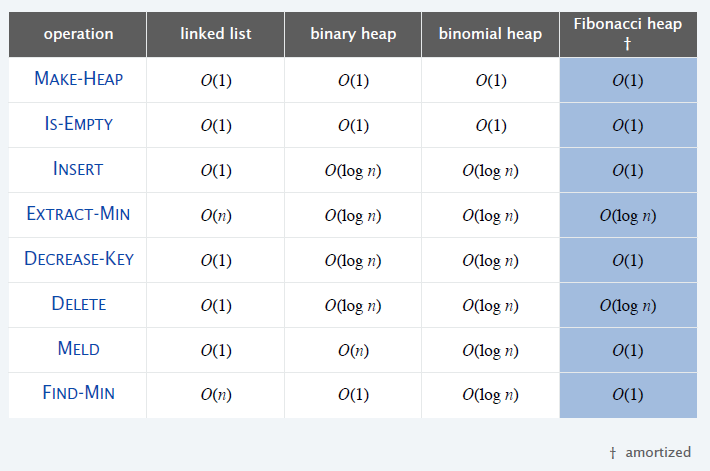

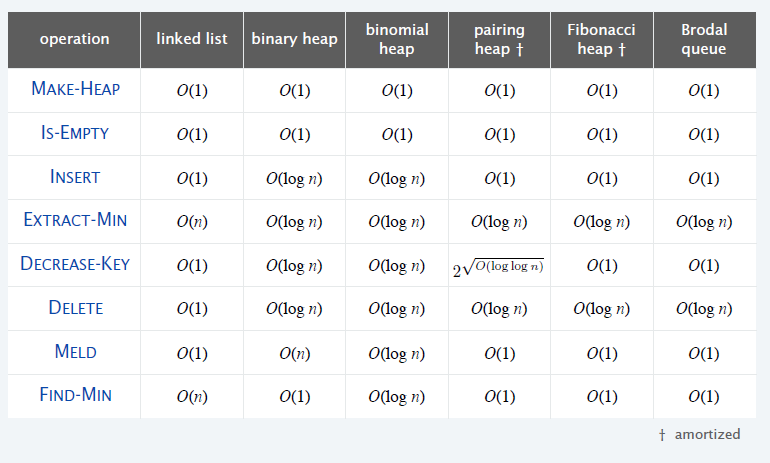

# Union-Find Data Structures

In progress